In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt


In [13]:
np.set_printoptions(suppress = True, precision=3); #Options for NumPy

In [14]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data" 

df = pd.read_csv("Data.csv");  

In [15]:
print(df.head())

   age  test_time  motor_UPDRS  total_UPDRS  Jitter(Absolute)  Jitter:RAP  \
0   72     5.6431       28.199       34.398          0.000034     0.00401   
1   72    12.6660       28.447       34.894          0.000017     0.00132   
2   72    19.6810       28.695       35.389          0.000025     0.00205   
3   72    25.6470       28.905       35.810          0.000027     0.00191   
4   72    33.6420       29.187       36.375          0.000020     0.00093   

   Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00317     0.01204  0.02565        0.230       0.01438       0.01309   
1      0.00150     0.00395  0.02024        0.179       0.00994       0.01072   
2      0.00208     0.00616  0.01675        0.181       0.00734       0.00844   
3      0.00264     0.00573  0.02309        0.327       0.01106       0.01265   
4      0.00130     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(Absolute),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560
Jitter:DDP,5875.0,0.008962,0.009371,0.000980,0.004730,0.006750,0.009870,0.172630
Shimmer,5875.0,0.034035,0.025835,0.003060,0.019120,0.027510,0.039750,0.268630
Shimmer(dB),5875.0,0.310960,0.230254,0.026000,0.175000,0.253000,0.365000,2.107000


In [10]:
def dddraw(X_reduced,name):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    # To get a better understanding of interaction of the dimensions
    # plot the first three PCA dimensions
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired)
    titel="First three directions of "+name 
    ax.set_title(titel)
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])

    plt.show()


In [17]:
from sklearn.linear_model import OrthogonalMatchingPursuit,RANSACRegressor,LogisticRegression,ElasticNetCV,HuberRegressor, Ridge, Lasso,LassoCV,Lars,BayesianRidge,SGDClassifier,LogisticRegressionCV,RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

    
# import some data to play with
X = df
Y=df['RPDE']
def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)

X = df
Y=np.round(df['RPDE']*100)
X=X.replace([np.inf, -np.inf], np.nan).fillna(value=0)
#print(X) #nasty NaN
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
poly = PolynomialFeatures(2)
X=poly.fit_transform(X)


names = [
         #'ElasticNet',
         'SVC',
#          'kSVC',
         'KNN',
         'DecisionTree',
         'RandomForestClassifier',
         #'GridSearchCV',
#          'HuberRegressor',
#          'Ridge',
#          'Lasso',
#          'LassoCV',
#          'Lars',
         #'BayesianRidge',
#          'SGDClassifier',
#          'RidgeClassifier',
         'LogisticRegression',
#          'OrthogonalMatchingPursuit',
         #'RANSACRegressor',
         ]

classifiers = [
    #ElasticNetCV(cv=10, random_state=0),
    SVC(),
    SVC(kernel = 'rbf', random_state = 0),
    KNeighborsClassifier(n_neighbors = 1),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 200),
    #GridSearchCV(SVC(),param_grid, refit = True, verbose = 1),
    HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,epsilon=2.95),
    Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True),
    Lasso(alpha=0.05),
    LassoCV(),
    Lars(n_nonzero_coefs=10),
    #BayesianRidge(),
    SGDClassifier(),
    RidgeClassifier(),
    LogisticRegression(),
    OrthogonalMatchingPursuit(),
    #RANSACRegressor(),
]
correction= [0,0,0,0,0,0,0,0,0,0,0,0]

temp=zip(names,classifiers,correction)
print(temp)

for name, clf,correct in temp:
    regr=clf.fit(X,Y)
    #print( name,'% errors', abs(regr.predict(X)+correct-Y).sum()/(Y.sum())*100)
    print(name,'%error',procenterror(regr.predict(X),Y),'rmsle',rmsle(regr.predict(X),Y))
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

    # Confusion Matrix
    print(name,'Confusion Matrix')
    print(confusion_matrix(Y, np.round(regr.predict(X) ) ) )
    print('--'*40)

    # Classification Report
    print('Classification Report')
    print(classification_report(Y,np.round( regr.predict(X) ) ))

    # Accuracy
    print('--'*40)
    logreg_accuracy = round(accuracy_score(Y, np.round( regr.predict(X) ) ) * 100,2)
    print('Accuracy', logreg_accuracy,'%')

SVC %error 15.5 rmsle 0.19284177274674888
SVC Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
--------------------------------------------------------------------------------
Classification Report


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       15.0       0.00      0.00      0.00         1
       20.0       0.00      0.00      0.00         1
       21.0       0.00      0.00      0.00         1
       22.0       0.00      0.00      0.00         1
       24.0       0.00      0.00      0.00         1
       25.0       0.00      0.00      0.00         5
       26.0       0.00      0.00      0.00         1
       27.0       0.00      0.00      0.00         9
       28.0       0.00      0.00      0.00        10
       29.0       0.00      0.00      0.00        12
       30.0       0.00      0.00      0.00        13
       31.0       0.00      0.00      0.00        17
       32.0       0.00      0.00      0.00        26
       33.0       0.00      0.00      0.00        22
       34.0       0.00      0.00      0.00        34
       35.0       0.00      0.00      0.00        43
       36.0       0.00      0.00      0.00        42
       37.0       0.00      0.00      0.00   

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       15.0       0.00      0.00      0.00         1
       20.0       0.00      0.00      0.00         1
       21.0       0.00      0.00      0.00         1
       22.0       0.00      0.00      0.00         1
       24.0       0.00      0.00      0.00         1
       25.0       0.00      0.00      0.00         5
       26.0       0.00      0.00      0.00         1
       27.0       0.00      0.00      0.00         9
       28.0       0.00      0.00      0.00        10
       29.0       0.00      0.00      0.00        12
       30.0       0.00      0.00      0.00        13
       31.0       0.00      0.00      0.00        17
       32.0       0.00      0.00      0.00        26
       33.0       0.00      0.00      0.00        22
       34.0       0.00      0.00      0.00        34
       35.0       0.00      0.00      0.00        43
       36.0       0.00      0.00      0.00        42
       37.0       0.00      0.00      0.00   

Accuracy 100.0 %
RandomForestClassifier %error 0.0 rmsle 0.0
RandomForestClassifier Confusion Matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
--------------------------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

       15.0       1.00      1.00      1.00         1
       20.0       1.00      1.00      1.00         1
       21.0       1.00      1.00      1.00         1
       22.0       1.00      1.00      1.00         1
       24.0       1.00      1.00      1.00         1
       25.0       1.00      1.00      1.00         5
       26.0       1.00      1.00      1.00         1
       27.0       1.00      1.00      1.00         9
       28.0       1.00      1.00      1.00        10
       29.0       1.00      1.00      1.00        12
       30.0       1.00      1.00      1.00        13
       31.0       1.00      1.00      1

Accuracy 100.0 %


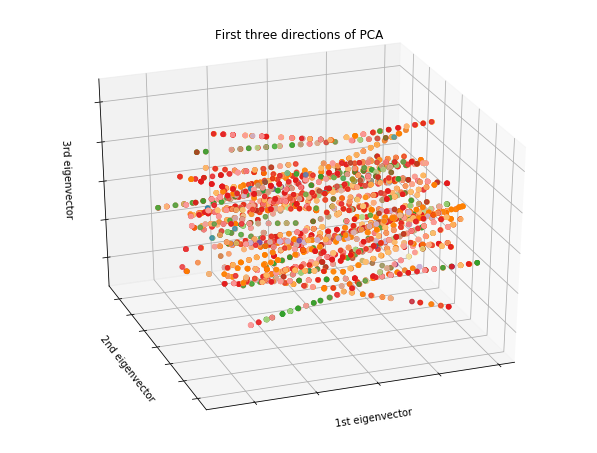

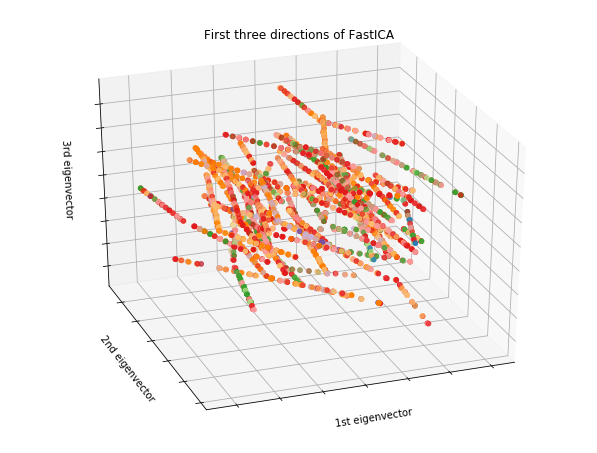

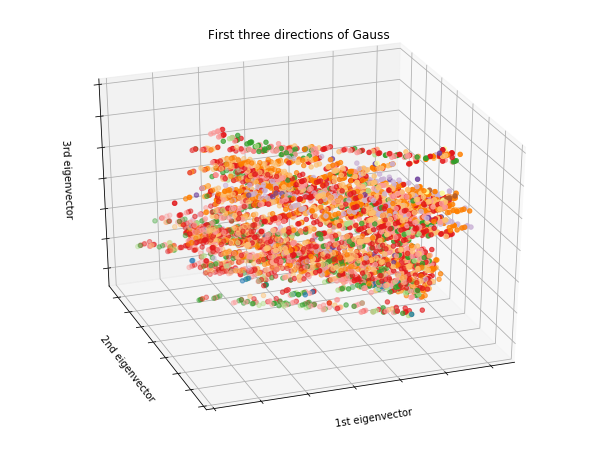

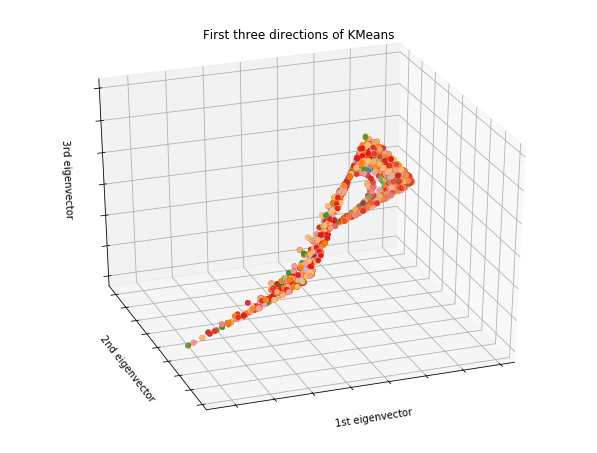

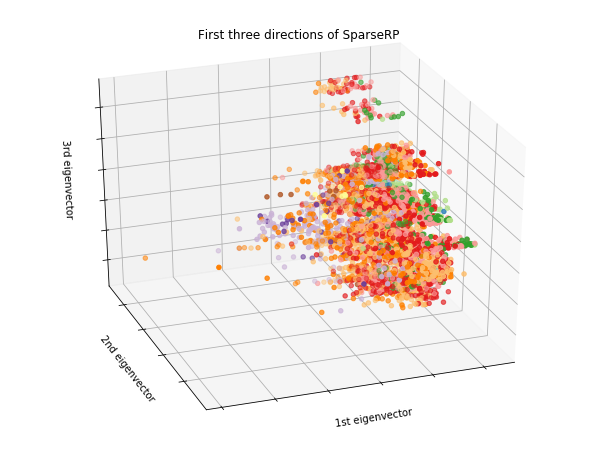

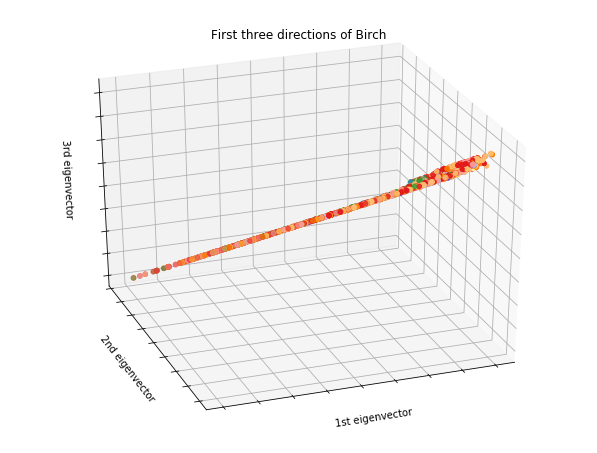

In [12]:
from sklearn.decomposition import PCA, FastICA,SparsePCA,NMF, LatentDirichletAllocation,FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection,SparseRandomProjection
from sklearn.cluster import KMeans,Birch
import statsmodels.formula.api as sm
from scipy import linalg
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
import matplotlib.pyplot as plt

def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return ( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ).round()

n_col=3
X = df
Y=df['RPDE']
def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)

names = [
         'PCA',
         'FastICA',
         'Gauss',
         'KMeans',
          #'SparsePCA',
         'SparseRP',
         'Birch',
         #'NMF',    
         #'LatentDietrich',    
        ]

classifiers = [
    PCA(n_components=n_col),
    FastICA(n_components=n_col),
    GaussianRandomProjection(n_components=3),
    KMeans(n_clusters=3),
    #SparsePCA(n_components=n_col),
    SparseRandomProjection(n_components=n_col, dense_output=True),
    Birch(branching_factor=10, n_clusters=2,threshold=0.5),
    #NMF(n_components=n_col),    
    LatentDirichletAllocation(n_topics=n_col)
    ]
correction= [1,1,0,0,0,0,0,0,0]

temp=zip(names,classifiers,correction)
print(temp)

for name, clf,correct in temp:
    Xr=clf.fit_transform(X,Y)
    dddraw(Xr,name)